<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Инструкция-по-выполнению-проекта" data-toc-modified-id="Инструкция-по-выполнению-проекта-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Инструкция по выполнению проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

### Инструкция по выполнению проекта
* Загрузите и изучите данные.
* Ответьте на вопрос и обоснуйте решение.
* Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
        a. Изменится. Приведите примеры матриц.
        b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
* Предложите алгоритм преобразования данных для решения задачи. Обоснуйте, почему качество линейной регрессии не поменяется.
* Запрограммируйте этот алгоритм, применив матричные операции. Проверьте, что качество линейной регрессии из sklearn не отличается до и после преобразования. Примените метрику R2.

### Описание данных
* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [1]:
!pip install sweetviz -q

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import scipy as sp
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [3]:
import sweetviz as sv

In [4]:
try:
    df_insurance = pd.read_csv('/datasets/insurance.csv')
except:
    df_insurance = pd.read_csv('F:/insurance.csv')

In [5]:
df_insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


                                             |          | [  0%]   00:00 -> (? left)


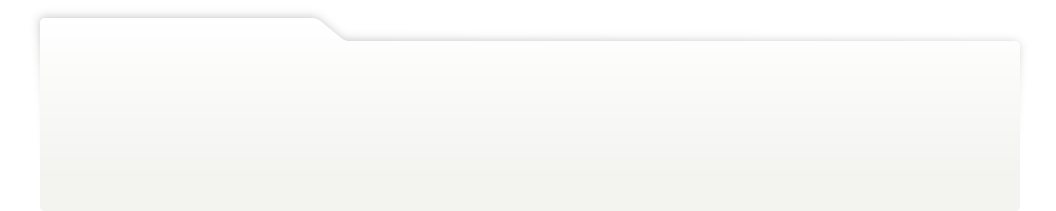
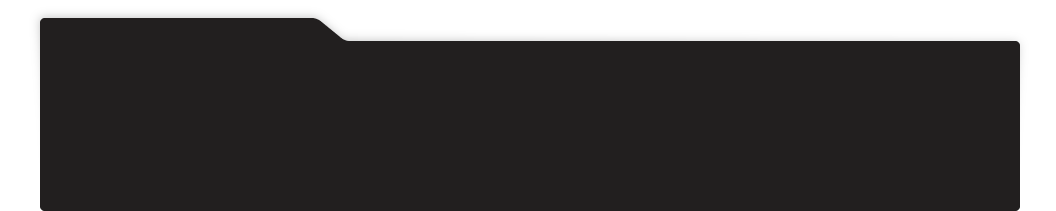
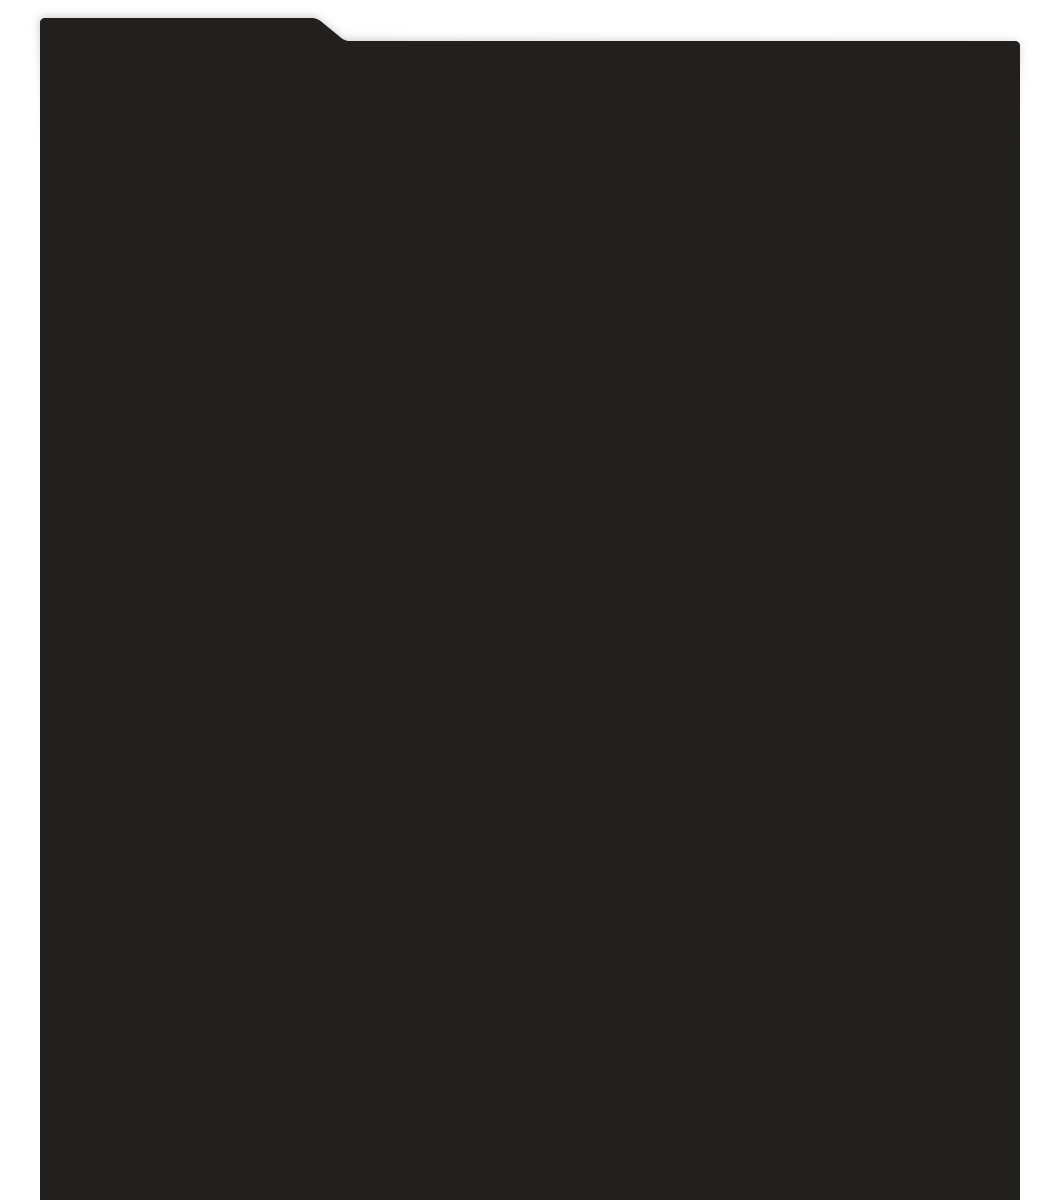
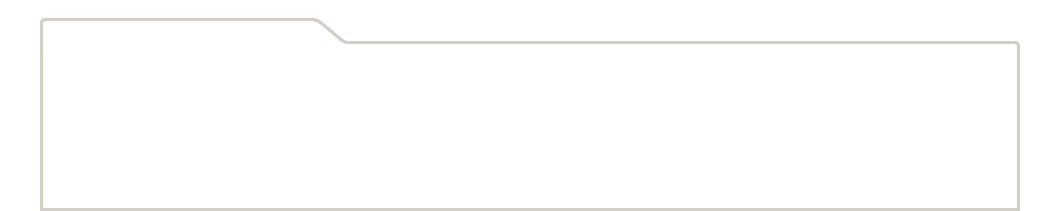
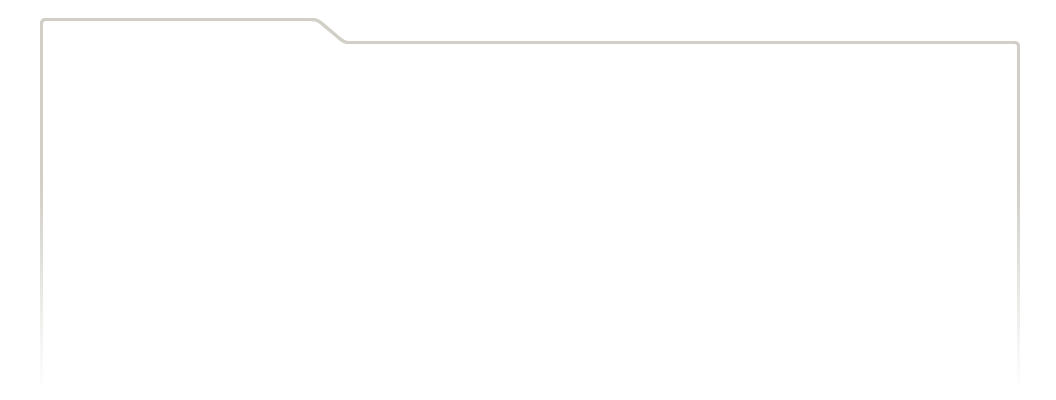
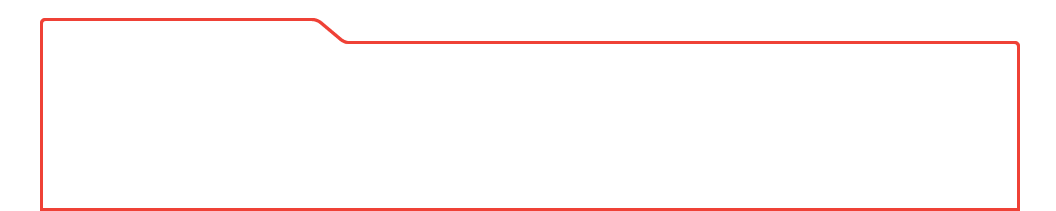
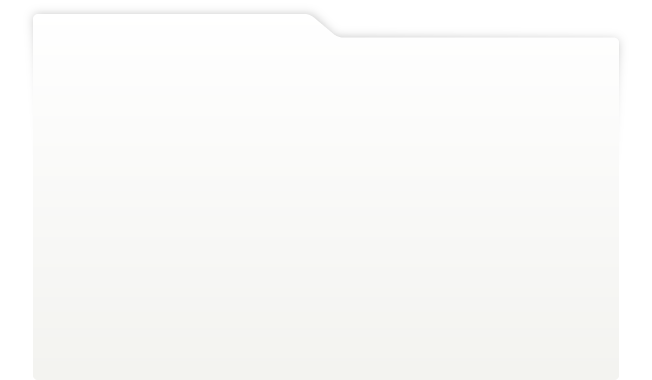
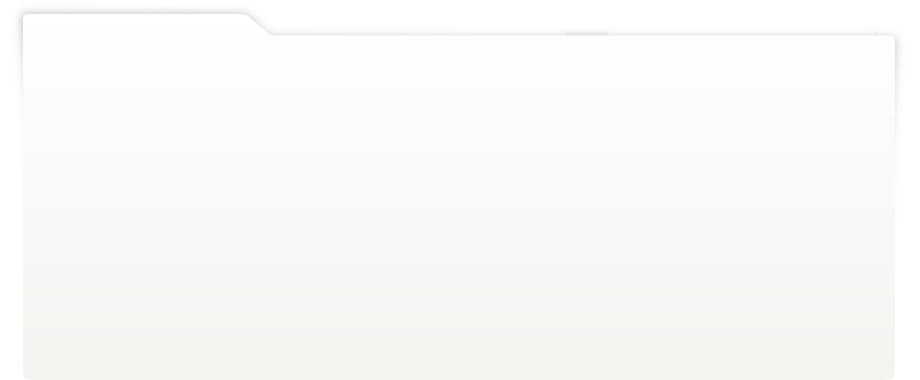
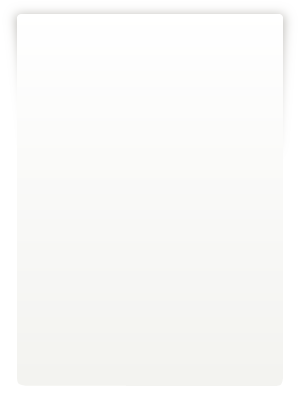
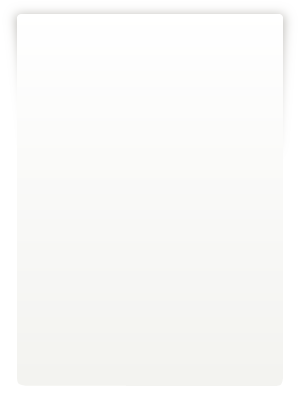
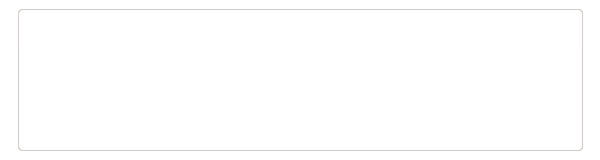
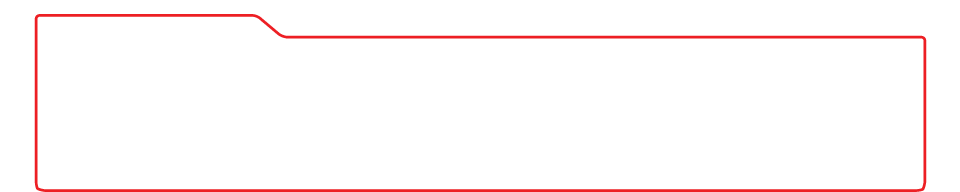
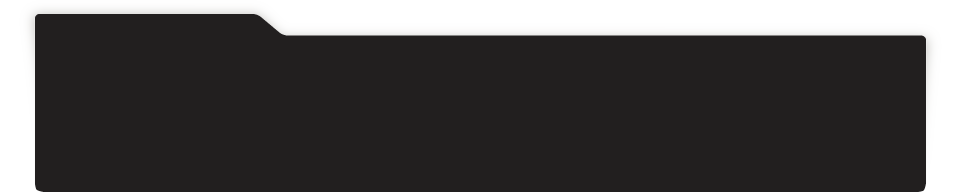
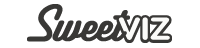
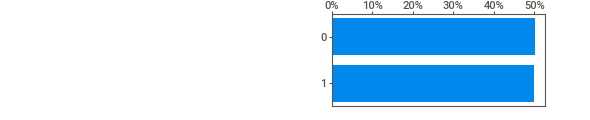
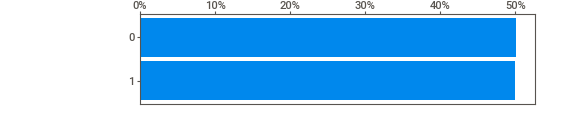
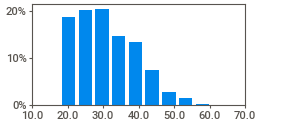
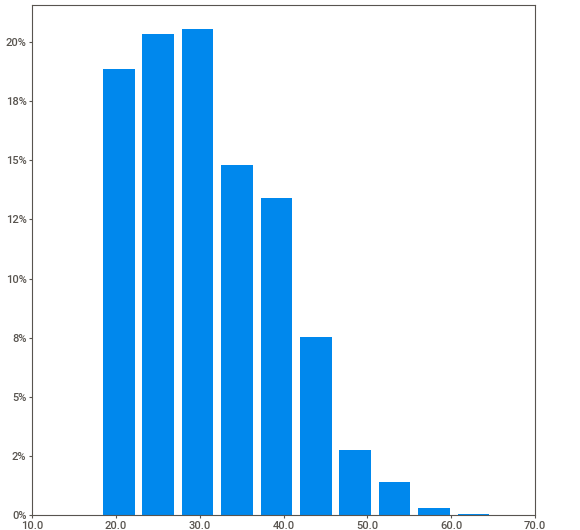
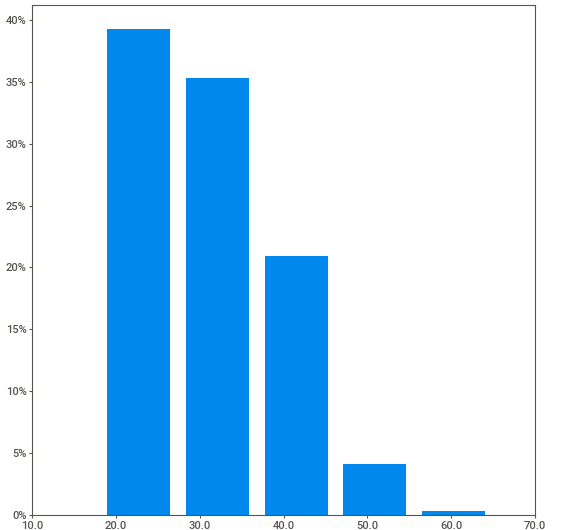
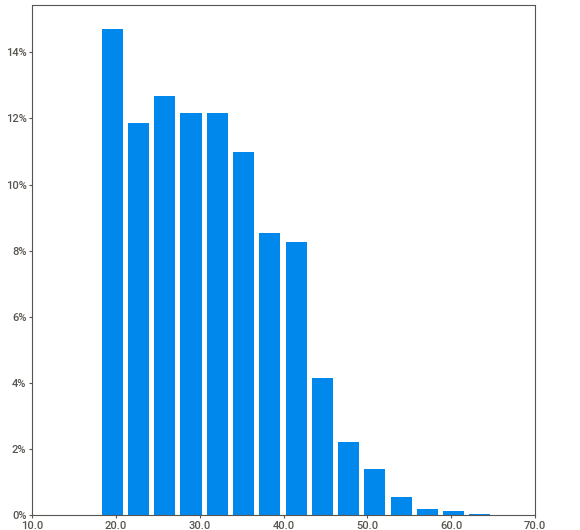
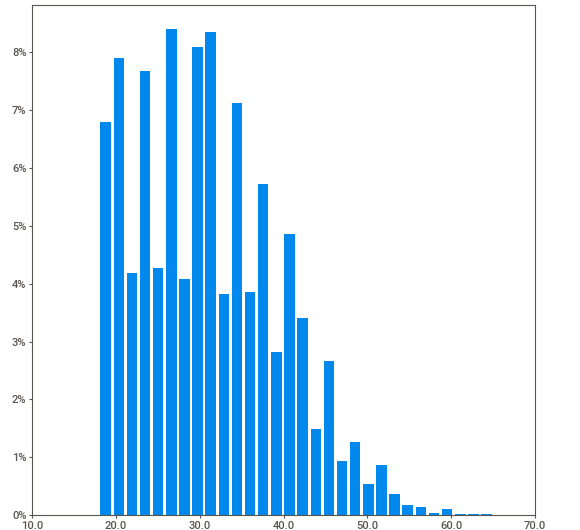
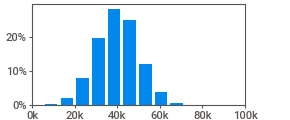
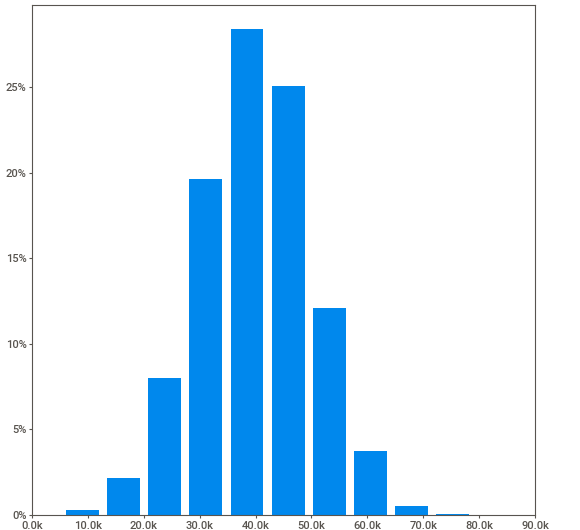
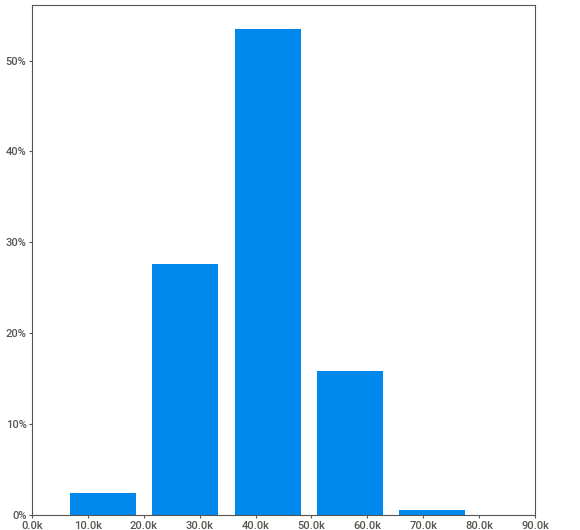
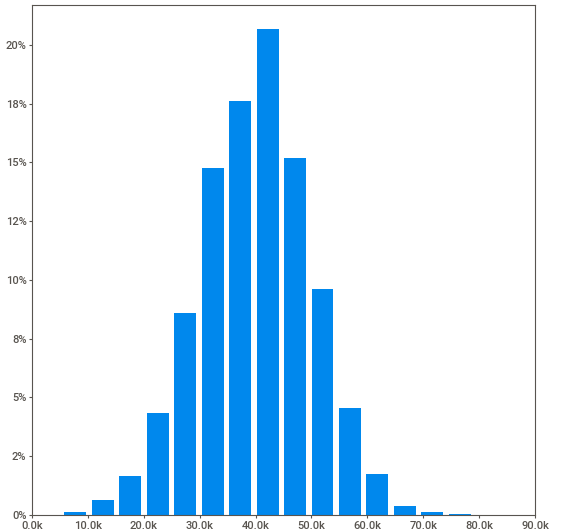
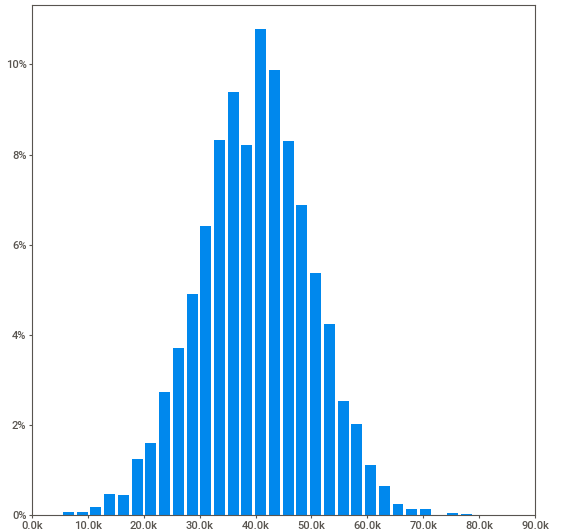
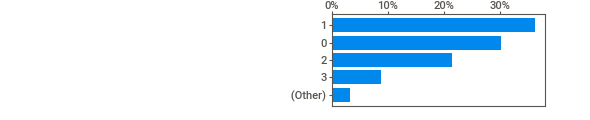
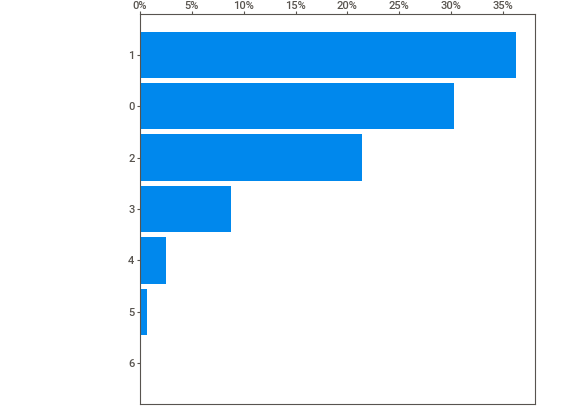
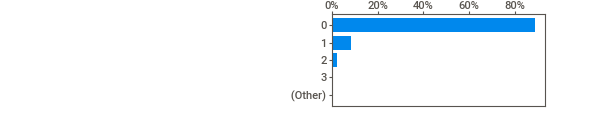
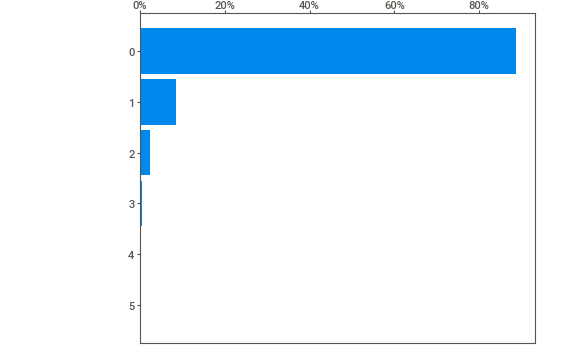
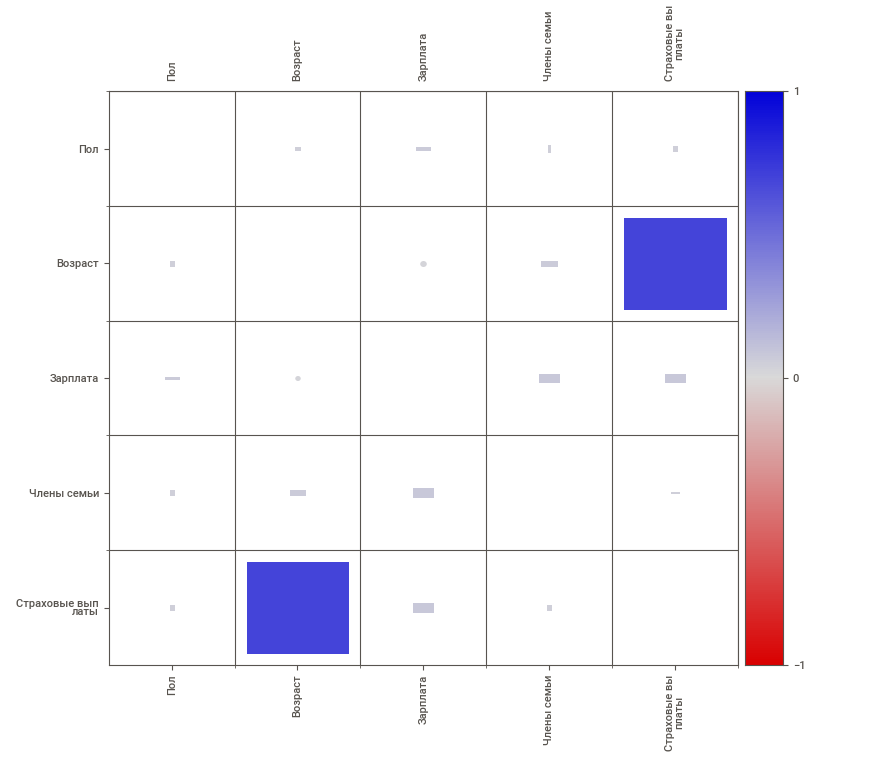
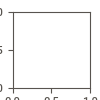

In [7]:
report_df_insurance = sv.analyze([df_insurance, 'Страхование'], pairwise_analysis='on')
report_df_insurance.show_notebook(w='100%', h='full', scale=None, filepath=None)

**Выводы**

Имеем датасет из 5000 строк с 4 фичами и 1 целевым признаком:
* Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
* Целевой признак: количество страховых выплат клиенту за последние 5 лет (очень высокая корреляция с призанком возраст)
* Пропусков и дубликатов нет

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При кодировании матрицы признаков $X$ матрицей $P$ формула обучения приобретает вид: $w' = P^{-1} (X^TX)^{-1} X^T y  = P^{-1} w $. При этом матрица $P$ должна быть квадратной обратимой. 

**Обоснование:** 

Если мы преобразуем (кодируем) матрицу признаков X матрицей P и получим новую матрицу Y, тогда $a' = Yw'$ будет выглядеть как $a' = XPw'$, задача обучения как $w' = \arg\min_w MSE(XPw', y)$, а формула обучения как $w' = (Y^T Y)^{-1} Y^T y = ((XP)^T XP)^{-1} (XP)^T y$. 

Пользуясь правилами: 

$(AB)^T = B^TA^T$,   

$AA^{-1} = E$,   

$(AB)^{-1} = B^{-1}A^{-1}$ (для $A$,$B$ - квадратных обратимых матриц) 



получим $w' = ((XP)^T XP)^{-1} (XP)^T y = (P^T X^T XP)^{-1} P^T X^T y = P^{-1} (X^TX)^{-1} (P^T)^{-1} P^T X^T y = P^{-1} (X^TX)^{-1} X^T y$

**Вывод**

При кодировании матрицы признаков $X$ матрицей $P$ формула обучения приобретает вид: $w' = P^{-1} w $. Матрица $P$ должна быть квадратной. Отсюда $a' = Yw' = XP P^{-1} w = a$, что доказывает, что предсказания должны совпасть, а качество линейной регрессии не изменится. Остается проверить это опытном путем.

## Алгоритм преобразования

**Алгоритм**

1. Разделяем данные на признаковую выборку $X$ и целевую $y$ 
2. Генерируем случайную кодирующую матрицу $P$ горизонтального размера $X$, проверяем ее на невырожденность
3. Умножаем признаковую выборку $X$ на матрицу $P$ и получаем закодированную матрицу $Y$
4. Добавляем столбец единиц в матрицу признаков $X$
5. Находим предсказания $a = Xw$ на исходной матрице $X$ на основании найденных весов по формуле $w = (X^TX)^{-1} X^T y$
6. Добавляем столбец единиц в матрицу признаков $Y$
7. Находим предсказания $a' = Yw'$ на закодированной матрице $Y$ на основании найденных весов по формуле $w' = (Y^TY)^{-1} Y^T y$
8. Сравниваем вектора предсказаний $a$ и $a'$ и R2 метрику качества

**Пояснение**

На самом деле, в доказательстве под матрицей $X$ имелась в виду расширенная матрица (с дополнительным столбцом из единиц), обозначим ее $\tilde X$. При умножении на матрицу $\tilde P$ и получалась новая матрица $\tilde Y=\tilde X \tilde P$. При этом в матрице $\tilde Y$ могло не получиться столбца из единиц. 
    
Но если в качестве матрицы $\tilde P$ взять матрицу спец. вида (с 1 и остальными 0 в первой строке и первом столбце), то в матрице $\tilde Y$ первый столбец будет тоже состоять из единиц:
    
$$ \begin{pmatrix}
  1& x_{11} & ...&x_{1m}\\
  1& x_{21} & ...&x_{2m}\\
  ...& ... & ...&...\\
  1& x_{n1} & ...&x_{nm}
\end{pmatrix} *
\begin{pmatrix}
  1& 0 & ...&0\\
  0& p_{11} & ...&p_{1m}\\
  ...& ... & ...&...\\
  0& p_{m1} & ...&p_{mm}
\end{pmatrix} =
\begin{pmatrix}
  1& y_{11} & ...&y_{1m}\\
  1& y_{21} & ...&y_{2m}\\
  ...& ... & ...&...\\
  1& y_{n1} & ...&y_{nm}
\end{pmatrix}.
$$    
Поэтому в описанном алгоритме (с дописыванием единичных столбцов) качество модели линейной регрессии тоже не изменится.

**Обоснование**

Согласно проделанным вычислениям мы праве ожидать получения одинакового качества линейной регрессии до преобразования и после.

## Проверка алгоритма

Разделим данные на признаковую и целевую выборки

In [8]:
X = df_insurance.drop('Страховые выплаты', axis=1)
y = df_insurance['Страховые выплаты']

Генерируем случайную кодирующую квадратную обратимую матрицу $P$ горизонтального размера $X$ с проверкой матрицы на невырожденность

In [9]:
np.random.seed(0)
def matrix_p(size):
    while True:
        m = np.random.randint(100, size=(size, size))
        if np.linalg.det(m) != 0:
            break
    return m

P = matrix_p(X.shape[1])
P

array([[44, 47, 64, 67],
       [67,  9, 83, 21],
       [36, 87, 70, 88],
       [88, 12, 58, 65]])

Умножаем датасет $X$ признаков на матрицу $P$ и получаем закодированный датасет $Y$

In [10]:
Y = X @ P
print(Y.shape)
Y

(5000, 4)


,0,1,2,3
0,1788479.0,4315628.0,3475525.0,4365793.0
1,1371170.0,3306426.0,2663876.0,3345031.0
2,757943.0,1827261.0,1472407.0,1848609.0
3,1502783.0,3628113.0,2920859.0,3670171.0
4,941520.0,2270999.0,1829388.0,2297455.0
...,...,...,...,...
4995,1287252.0,3106176.0,2501440.0,3142318.0
4996,1888766.0,4559118.0,3670880.0,4611979.0
4997,1221916.0,2949504.0,2374776.0,2983750.0
4998,1178982.0,2845181.0,2291064.0,2878324.0


Создаем метод линейной регрессии через классы 

In [11]:
class CustomLinearRegression:
    
    def fit(self, X_train, y_train):
        
        X = np.concatenate((np.ones((X_train.shape[0], 1)), X_train), axis=1)
        y = y_train
        w = np.linalg.inv(X.T@ X) @ X.T @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, X_test):
        
        return X_test.dot(self.w) + self.w0

Проводим обучение модели и находим предсказания на исходной матрице 

In [12]:
model = CustomLinearRegression()
model.fit(X, y)
predictions_X = model.predict(X)

print('Предсказания на матрице Х на кастомном методе линейной регрессии')
print()
print(predictions_X)
print()
print('R2 метрика:', r2_score(y, predictions_X))

Предсказания на матрице Х на кастомном методе линейной регрессии

0       0.511727
1       0.684316
2       0.093734
3      -0.222589
4       0.065084
          ...   
4995    0.028390
4996    0.253367
4997   -0.256970
4998   -0.190992
4999    0.049050
Length: 5000, dtype: float64

R2 метрика: 0.4249455028666801


Проводим обучение модели и находим предсказания на закодированной матрице

In [13]:
model = CustomLinearRegression()
model.fit(Y, y)
predictions_Y = model.predict(Y)

print('Предсказания на матрице Y на кастомном методе линейной регрессии')
print()
print(predictions_Y)
print()
print('R2 метрика:', r2_score(y, predictions_Y))

Предсказания на матрице Y на кастомном методе линейной регрессии

0       0.511733
1       0.684322
2       0.093740
3      -0.222583
4       0.065090
          ...   
4995    0.028396
4996    0.253372
4997   -0.256964
4998   -0.190985
4999    0.049056
Length: 5000, dtype: float64

R2 метрика: 0.4249455027006064


Видим, что метрика качества практически совпала

Проделываем обучение модели и получение предсказаний на методе линейной регрессии из библиотеки sklearn

In [14]:
model = LinearRegression()
model.fit(X, y)
predictions_X = model.predict(X)

print('Предсказания на матрице Х на методе линейной регрессии из библиотеки sklearn')
print()
print(predictions_X)
print()
print('R2 метрика:', r2_score(y, predictions_X))

Предсказания на матрице Х на методе линейной регрессии из библиотеки sklearn

[ 0.51172715  0.68431581  0.09373365 ... -0.25697046 -0.19099161
  0.04904991]

R2 метрика: 0.42494550286668


In [15]:
model = LinearRegression()
model.fit(Y, y)
predictions_Y = model.predict(Y)

print('Предсказания на матрице Y на методе линейной регрессии из библиотеки sklearn')
print()
print(predictions_Y)
print()
print('R2 метрика:', r2_score(y, predictions_Y))

Предсказания на матрице Y на методе линейной регрессии из библиотеки sklearn

[ 0.51172715  0.68431581  0.09373365 ... -0.25697046 -0.19099161
  0.04904991]

R2 метрика: 0.424945502866666


Проверка на случайной матрице признаков

In [16]:
Z = np.random.randint(100, size=(X.shape[0], X.shape[1]))
model = LinearRegression()
model.fit(Z, y)
predictions_Z = model.predict(Z)

print('Предсказания на случайной матрице Z на методе линейной регрессии из библиотеки sklearn')
print()
print(predictions_Z)
print()
print('R2 метрика:', r2_score(y, predictions_Z))

Предсказания на случайной матрице Z на методе линейной регрессии из библиотеки sklearn

[0.1549444  0.13562519 0.12968322 ... 0.1381695  0.1529021  0.13805954]

R2 метрика: 0.0003921527427439564


Проверка при P * X (тогда на Р нужно умножить и вектор у, а матрица весов не изменится)

In [17]:
P = np.random.randint(100, size=(X.shape[0], X.shape[0]))
M = P @ X
y = P @ y
model = LinearRegression()
model.fit(M, y)
predictions_M = model.predict(M)

print('Предсказания на матрице M на методе линейной регрессии из библиотеки sklearn')
print()
print(np.dot(np.linalg.inv(P), predictions_M))
print()
print('R2 метрика:', r2_score(y, predictions_M))

Предсказания на матрице M на методе линейной регрессии из библиотеки sklearn

[ 0.00258858  1.0801437   0.81170889 ... -1.69501962  0.20271393
 -0.42348739]

R2 метрика: 0.36812919691377877


Видим, что предсказания менее точны из-за накапливания ошибки округлений при вычислениях

**Вывод**

Мы получили практически одинаковые предсказания на исходных и закодированных данных методом линейной регресии, как построенном на классах через матричные функции, так и в готовом виде в библиотеке sklearn. Значит мы можем изменить данные до неузнаваемости при помощи умножения на случайную матрицу, которая будет являться по сути ключом к ним, и при этом получить те же предсказания.